<a href="https://colab.research.google.com/github/devastio/devastio-Fey-Devastio-Putra-Naldi_Damin-01_UAS/blob/master/Fey_Devastio_Putra_Naldi_Damin_01_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UAS Data Mining**

Fey Devastio Putra Naldi / 1301174070 / SIDE-40-GAB01

**Pemanggilan Library yang digunaakan pada proses task data mining**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.naive_bayes import GaussianNB
import statistics

dataset = pd.read_csv(r'/content/drive/My Drive/UAS.csv')  

### **Dataset yang digunaka pada proses task data mining**

In [0]:
dataset

,Lokasi,Lat,long,Dikonfirmasi,Sembuh,Meninggal Dunia
0,Aceh,4.695135,96.749397,7,4,1
1,Jakarta,-6.200000,106.816666,3260,286,298
2,West Java,-6.914864,107.608238,756,75,68
3,East Java,-7.250445,112.768845,603,101,58
4,Central Java,-6.966667,110.416664,449,51,44
5,South Sulawesi,-5.135399,119.423790,374,73,30
6,Banten,-6.120000,106.150276,341,17,35
7,Bali,-8.409518,115.188919,150,42,3
8,Papua,-2.598744,140.673179,118,28,6
9,South Kalimantan,-0.502106,117.153709,98,9,6


### **Proses penghapusan atribut yang tidak digunakan pada task data mining**

In [0]:
dataset.drop(["Lokasi","Lat","long"], axis = 1, inplace = True)

**Visualisasi Data setelah penghapusan atribut yang tidak diperlukan task data mining**

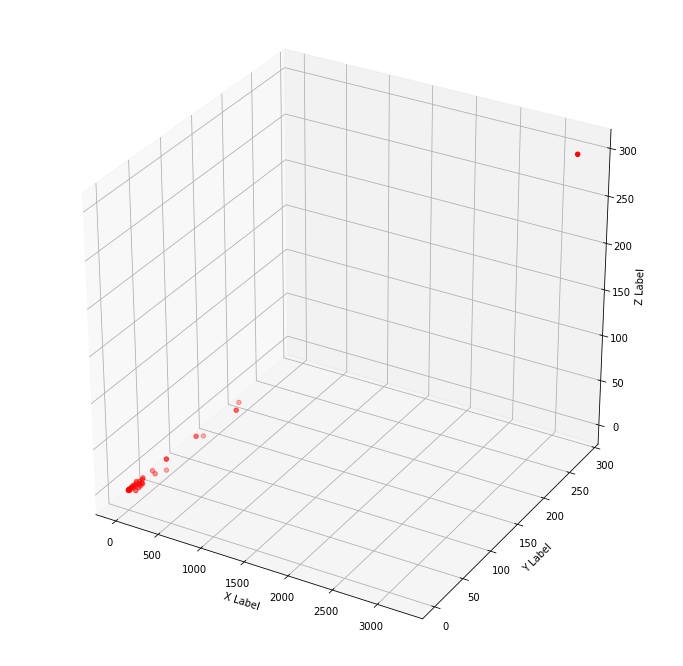

In [0]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset['Dikonfirmasi'], dataset['Sembuh'], dataset['Meninggal Dunia'], c = 'r', marker = "o")
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

### **Proses pengecekan outlier pada dataset**

berikut adalah gambar dari baris mana saja yang termasuk outlier dan tidak. untuk outlier diberi nilai True dan untuk yang tidak termasuk outlier diberi nilai False

![gambar pembagian atribut pada proses split data](https://drive.google.com/uc?id=1-JO5p2PEbc3rkti2tucXxoXcYGZu9Jnb)



**Proses menghapus baris outlier**

In [0]:
dataset.drop([1, 2, 3, 4, 5, 6, 7], inplace = True)

**Visualisasi Data setelah penghapusan baris yang termasuk outlier**

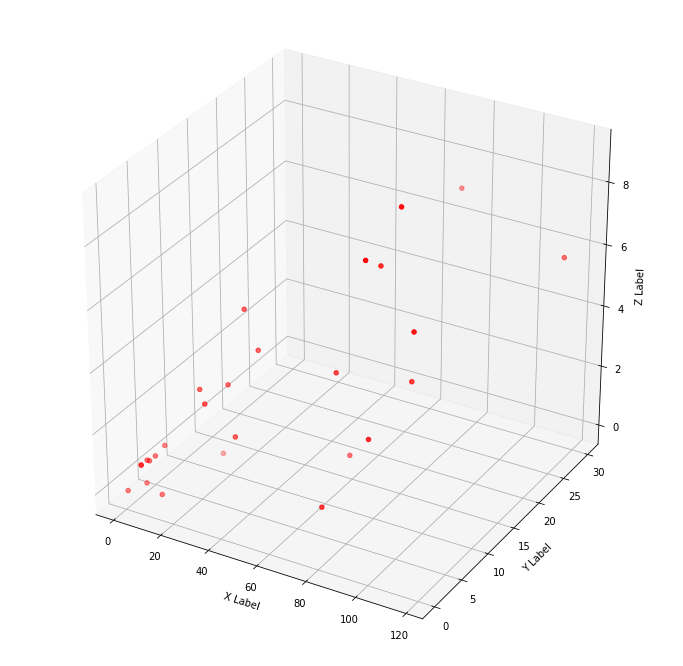

In [0]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset['Dikonfirmasi'], dataset['Sembuh'], dataset['Meninggal Dunia'], c = 'r', marker = "o")
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [0]:
dataset

,Dikonfirmasi,Sembuh,Meninggal Dunia
0,7,4,1
8,118,28,6
9,98,9,6
10,93,11,4
11,89,5,3
12,84,13,9
13,81,8,8
14,77,2,1
15,76,13,7
16,72,30,7


### **Proses Scaling Dataset**

In [0]:
scaler = MinMaxScaler(feature_range=(0,10))
dataset = scaler.fit_transform(dataset)
dataset = pd.DataFrame(dataset)
dataset.columns = ['Dikonfirmasi','Sembuh', 'Meninggal']

In [0]:
dataset

,Dikonfirmasi,Sembuh,Meninggal
0,0.512821,1.333333,1.111111
1,10.000000,9.333333,6.666667
2,8.290598,3.000000,6.666667
3,7.863248,3.666667,4.444444
4,7.521368,1.666667,3.333333
5,7.094017,4.333333,10.000000
6,6.837607,2.666667,8.888889
7,6.495726,0.666667,1.111111
8,6.410256,4.333333,7.777778
9,6.068376,10.000000,7.777778


### **Proses Pengecekan jumlah nilai kelas optimal yang akan digunakan pada proses klasifikasi**

Pada proses ini menerapakan metode elbow 

In [0]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dataset)
    Sum_of_squared_distances.append(km.inertia_)

Visualisasi dari metode elbow

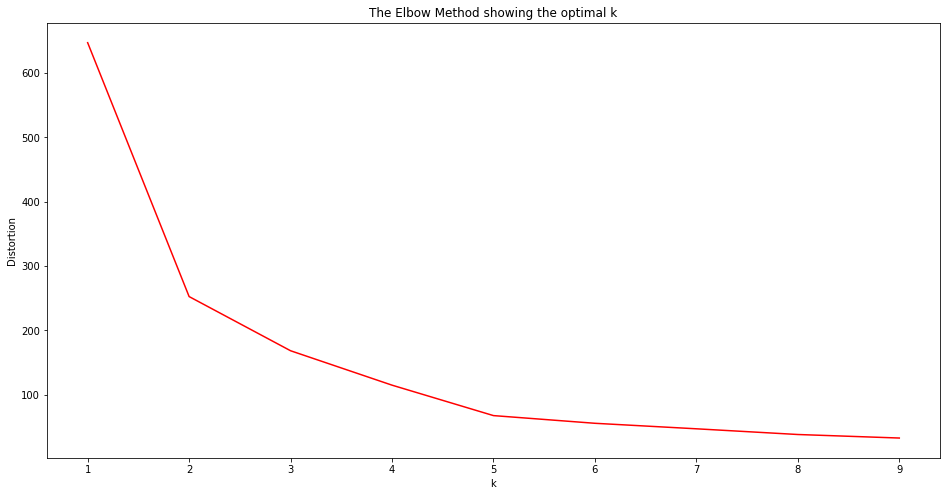

In [0]:
plt.figure(figsize=(16,8))
plt.plot(K, Sum_of_squared_distances,c='r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

berdasarkan dari visualisasi, dapat disimpulkan bahwa jumlah nilai atribut kelas yang akan digunakan adalah memiliki rentang dari nilai 2 hingga nilai 5. untuk penerapan task data mining ini akan menggunakan nilai 3.

### **Proses Pembuatan atribut kelas pada dataset**

proses ini akan menerapakan metode K-Means Clustering untuk mendapatkan nilai dari atribut kelas dengan jumlah sesuai dengan hasil dari proses sebelumnya yaitu 3.

In [0]:
dataset =  np.array(dataset)

In [0]:
kmeans = KMeans(n_clusters = 3, random_state=123)
kmeans.fit(dataset)
a = kmeans.labels_
dataset = pd.DataFrame(dataset)
dataset.columns = ['Dikonfirmasi','Sembuh', 'Meninggal']
data = pd.DataFrame(a)
data.columns = ['Cluster']
dataset = pd.concat([dataset,data], axis=1)
dataset

,Dikonfirmasi,Sembuh,Meninggal,Cluster
0,0.512821,1.333333,1.111111,0
1,10.000000,9.333333,6.666667,1
2,8.290598,3.000000,6.666667,1
3,7.863248,3.666667,4.444444,1
4,7.521368,1.666667,3.333333,2
5,7.094017,4.333333,10.000000,1
6,6.837607,2.666667,8.888889,1
7,6.495726,0.666667,1.111111,2
8,6.410256,4.333333,7.777778,1
9,6.068376,10.000000,7.777778,1


**Visualisasi persebaran data yang sudah dikelompokkan berdasarkan nilai atribut kelas.**

untuk data yang bernilai "0" warna kelompoknya adalah ungu dengan titik tengah dari kelompok tersebut berwarna biru

untuk data yang bernilai "1" warna kelompoknya adalah hijau dengan titik tengah dari kelompok tersebut berwarna orange

untuk data yang bernilai "2" warna kelompoknya adalah kuning dengan titik tengah dari kelompok tersebut berwarna hijau

untuk urutan tingkat keseriusan berdasarkan kelompok yang telah dibentuk adalah mulai dari tingkat rendah yaitu nilai "0", tingkat sedang yaitu nilai "2" dan tingkat tinggi yaitu nilai "1"

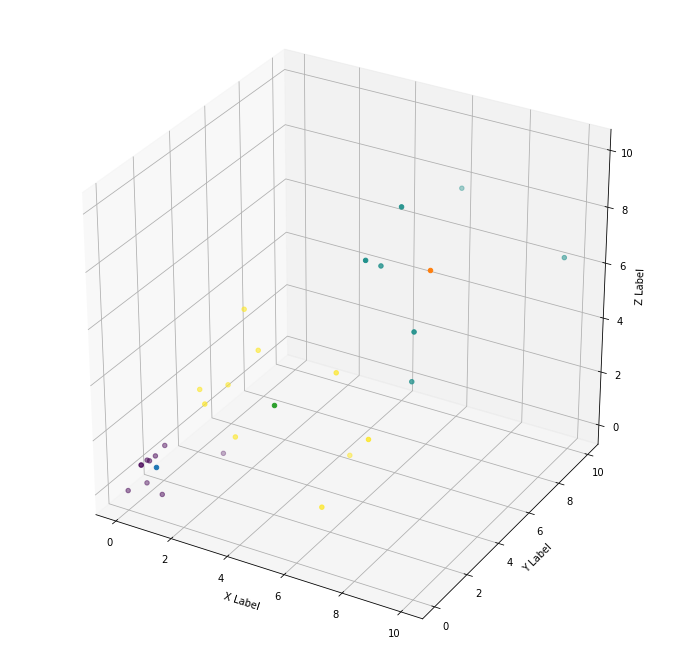

In [0]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset['Dikonfirmasi'], dataset['Sembuh'], dataset['Meninggal'], c = dataset['Cluster'], marker = "o")
for i in range(0,len(centers)):
  ax.scatter(centers[i][0], centers[i][1], centers[i][2], marker="o");
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

### **Proses Klasifikasi**

proses ini menggunakan metode naive bayes dengan jenis gaussian naive bayes dengan alasan mudah untuk diterapkan serta memiliki nilai performa yang baik

In [0]:
data_encoded = []
for i in range(0,len(dataset.columns)-1):
        data_encoded.append(dataset[dataset.columns[i]])    
data = list(zip(*data_encoded))
cluster = dataset['Cluster']

### **Proses Evaluasi**

proses ini menggunakan metode K-Fold Cross Validation dengan membagi data menjadi 10 bagian dan 10 iterasi serta untuk pembagian data testing dan data training dibagi dengan ratio 70% untuk data training dan 30% untuk data testing. 

In [0]:
clf = GaussianNB()
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

**Nilai Performa Akurasi**

In [0]:
scores = cross_val_score(clf, data, cluster, cv=cv, scoring='accuracy')
avg_score = statistics.mean(scores).round(3)
score = avg_score*100
print('Accuracy = ',score,' %')

Accuracy =  92.2  %


**Nilai Performa Recall dengan Perhitungan Macro**

In [0]:
scores = cross_val_score(clf, data, cluster, cv=cv, scoring='recall_macro')
avg_score = statistics.mean(scores).round(3)
score = avg_score*100
print('Recall = ',score,' %')

Recall =  92.2  %


**Nilai Performa Precision dengan Perhitungan Macro**


In [0]:
scores = cross_val_score(clf, data, cluster, cv=cv, scoring='precision_macro')
avg_score = statistics.mean(scores).round(3)
score = avg_score*100
print('Precision = ',score,' %')

Precision =  94.69999999999999  %


**Nilai Performa F1-Score dengan Perhitungan Macro**


In [0]:
scores = cross_val_score(clf, data, cluster, cv=cv, scoring='f1_macro')
avg_score = statistics.mean(scores).round(3)
score = avg_score*100
print('F1-Score = ',score,' %')

F1-Score =  91.5  %
